# Optimal approximations for $\sin$

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## Linear fit 

In [2]:
x, a, b = sp.symbols('x a b')

Let's find the linear approximation $a + bx$ for $\sin(x)$ on the interval $x \in [0, \pi/2]$ 
$$
J = J(a, b) = \int_0^{\pi/2} \left[ \sin(x) - (a + bx) \right]^2 dx
$$

In [3]:
J = sp.integrate((sp.sin(x) -a - b * x)**2, (x, 0, sp.pi/2)).simplify()

In [4]:
optimal_solution = sp.solve([sp.Eq(J.diff(a), 0), sp.Eq(J.diff(b), 0)])

Optimal parameters

In [5]:
optimal_solution[a]

8*(-3 + pi)/pi**2

In [6]:
optimal_solution[b]

24*(4 - pi)/pi**3

In [7]:
[(_, v.evalf()) for _, v in optimal_solution.items()]

[(a, 0.114770682054219), (b, 0.664438898171044)]

Compare

In [8]:
linear_fit = sp.lambdify(x, (a + b * x).subs(optimal_solution), 'numpy')

In [9]:
phi = np.linspace(0, 0.5 * np.pi, 200)

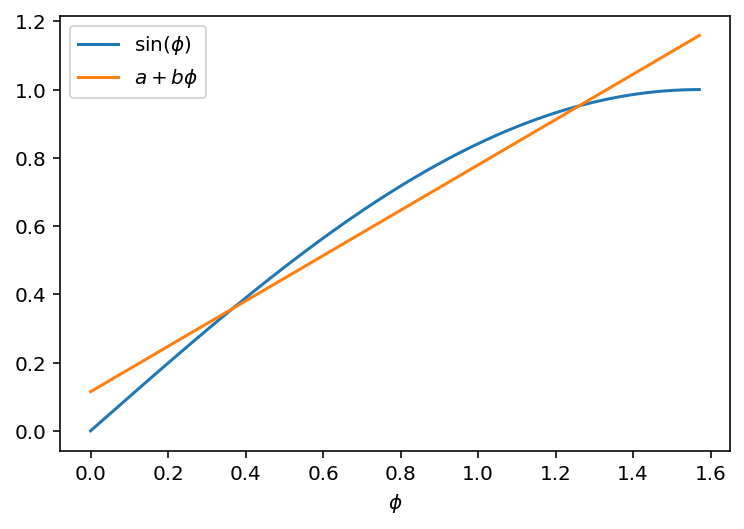

In [10]:
plt.plot(phi, np.sin(phi), label='$\sin(\phi)$')
plt.plot(phi, linear_fit(phi), label='$a + b \phi$')
#plt.plot(phi, phi)
plt.xlabel('$\phi$')
plt.legend()
plt.show()

### The least-square error for the cubic fit

In [11]:
J.subs(optimal_solution).simplify().evalf()

0.00618858317218501

In other words,
$$
\min_{a, b} \int_0^{\pi/2} \left[ \sin(x) - (a + bx) \right]^2 dx \approx 0.0062
$$

## Qubic fit

Let's find the qubic approximation for $\sin(x)$ on the interval $x \in [0, \pi/2]$ 
$$
J = J(a, b, c) = \int_0^{\pi/2} \left[ \sin(x) - \left(a + bx + cx^3\right) \right]^2 dx
$$

In [12]:
c = sp.symbols('c')

In [13]:
J = sp.integrate((sp.sin(x) -a - b * x -c * x ** 3)**2, (x, 0, sp.pi / 2)).simplify()

In [14]:
J

pi*a**2/2 + pi**2*a*b/4 + pi**4*a*c/32 - 2*a + pi**3*b**2/24 + pi**5*b*c/80 - 2*b + pi**7*c**2/896 - 3*pi**2*c/2 + 12*c + pi/4

In [15]:
optimal_solution = sp.solve([sp.Eq(J.diff(a), 0), sp.Eq(J.diff(b), 0), sp.Eq(J.diff(c), 0)])

In [16]:
optimal_solution[a]

64*(-210 + 2*pi**3 + 15*pi**2)/(9*pi**4)

In [17]:
linear_fit = sp.lambdify(x, (a + b * x + c * x ** 3).subs(optimal_solution), 'numpy')

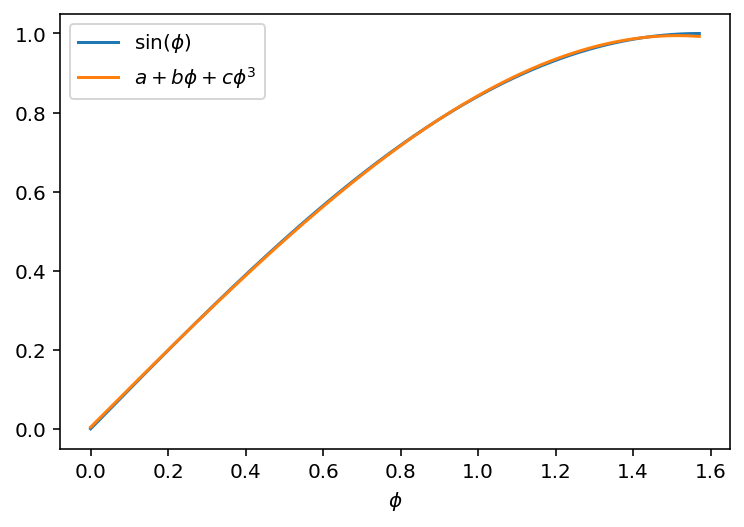

In [18]:
phi = np.linspace(0, 0.5 * np.pi, 200)

plt.plot(phi, np.sin(phi), label='$\sin(\phi)$')
plt.plot(phi, linear_fit(phi), label='$a + b \phi + c \phi ^ 3$')
plt.xlabel('$\phi$')
plt.legend()
plt.show()

### The least-square error for the cubic fit

In [19]:
J.subs(optimal_solution).simplify().evalf()

8.30990166339638e-6

In other words,
$$
\min_{a,b,c} \int_0^{\pi/2} \left[ \sin(x) - \left(a + bx + cx^3\right) \right]^2 dx \approx 8.31 \times 10^{-6}
$$